# FACE DETECTION


#### Import all required libraries

In [1]:
import cv2
import matplotlib.pyplot as plt

#### Loading the image to be tested using imread() function
#### The imread() function reads the image from the specified file.

#### Syntax: cv2.imread(path)

#### Parameters:
* path: A string representing the path of the image to be read.
* flag: It specifies the way in which image should be read.

#### All three types of flags are described below:

* cv2.IMREAD_COLOR: It specifies to load a color image. Any transparency of image will be neglected. It is the default flag. Alternatively, we can pass integer value 1 for this flag.
* cv2.IMREAD_GRAYSCALE: It specifies to load an image in grayscale mode. Alternatively, we can pass integer value 0 for this flag.
* cv2.IMREAD_UNCHANGED: It specifies to load an image as such including alpha channel. Alternatively, we can pass integer value -1 for this flag.

In [2]:
image = cv2.imread('robert.jfif');

#### cv2.imshow() method is used to display an image in a window.
 
#### Syntax: cv2.imshow(window_name, image)
#### Parameters: 
* window_name: A string representing the name of the window in which image to be displayed. 
* image: It is the image that is to be displayed.

Using matplotlib to diaplay image as we have to work with coordinates

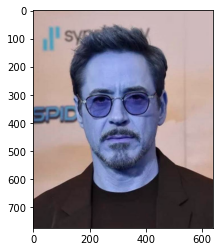

In [3]:
plt.imshow(image);

#### OpenCV loads an image in BGR format, so we need to convert it into RBG format to be able to display its true colors.

#### We use cv2.cvtcolor() method which is used to convert an image from one color space to another.

#### Syntax: cv2.cvtColor(src, code)

#### Parameters:
* src: It is the image whose color space is to be changed.
* code: It is the color space conversion code.


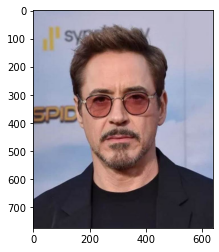

In [4]:
image_RGB=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
plt.imshow(image_RGB)

#### The detection works only on grayscale images. So it is important to convert the color image to grayscale 

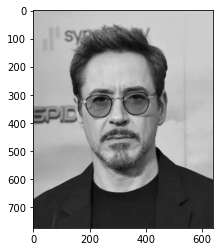

In [5]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray')

In [6]:
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import cv2
import numpy as np
from matplotlib import pyplot as plt
sl = widgets.SelectionSlider(options=[0, 1], value= 0)

def f(color):
#     img = cv2.imread(image, read_flag); 
    if(color == 1):
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else: 
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        plt.imshow(image_gray, cmap='gray')
    plt.show()
interact(f, color=sl)

interactive(children=(SelectionSlider(description='color', options=(0, 1), value=0), Output()), _dom_classes=(…

<function __main__.f(color)>

#### Loading the classifier for frontal face which is prebuilt in OpenCV

In [7]:
haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

Github Link :: https://github.com/opencv/opencv/tree/master/data/haarcascades

#### detectMultiScale function detects objects of different sizes in the input image. The detected objects are returned as a list of rectangles.Here it is used to detect the faces. It returns coordinates(x,y,w,h) of the detected face. 

#### Parameters
* input image - image in which face is to be detected.
* scaleFactor	Parameter specifying how much the image size is reduced at each image scale.
* minNeighbors	Parameter specifying how many neighbors each candidate rectangle should have to retain it.

#### Last two parameters have to be tuned according to the data.

#### face_rects contains a list of coordinates for the rectangular regions where faces were found.These coordinates are used to draw the rectangles on the image.

In [8]:
faces_rects = haar_cascade_face.detectMultiScale(image_gray, scaleFactor = 1.2, minNeighbors = 6);
print(faces_rects)

[[106 165 404 404]]


Here's the plot <img src="robert_coordinates.png" width=1000 height=1000 />

#### Printing the number of faces

In [10]:
print('Faces found: ', len(faces_rects))

Faces found:  1


#### Looping over all the coordinates and drawing rectangles around the faces using cv2.rectangle function.

#### Syntax: cv2.rectangle(image, start_point, end_point, color, thickness)

#### Parameters:
* image: It is the image on which rectangle is to be drawn.
* start_point: It is the starting coordinates of rectangle. The coordinates are represented as tuples of two values i.e. (X coordinate value, Y coordinate value).
* end_point: It is the ending coordinates of rectangle. The coordinates are represented as tuples of two values i.e. (X coordinate value + width, Y coordinate value + height).
* color: It is the color of border line of rectangle to be drawn. For BGR, we pass a tuple. eg: (255, 0, 0) for blue color.
* thickness: It is the thickness of the rectangle border line in px.

In [11]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(image_RGB, (x, y), (x+w, y+h), (0, 0, 255), 8)

#### Displaying the image 

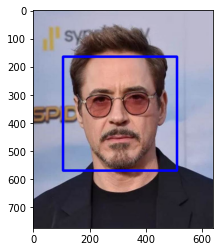

In [12]:
plt.imshow(image_RGB)

# EYE DETECTION

#### Loading the classifier for eyes

In [13]:
eye_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')

#### detectMultiscale returns a list of coordinates to draw a rectangle around detected eyes

In [14]:
eyes = eye_cascade.detectMultiScale(image_RGB)

#### Looping over all the coordinates and drawing rectangles around the eyes

In [15]:
for (ex, ey ,ew, eh) in eyes:
    cv2.rectangle(image_RGB, (ex,ey), (ex+ew, ey+eh), (0, 255, 0), 5)

#### Displaying images

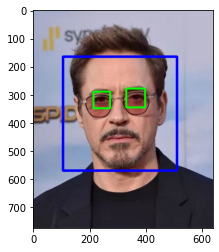

In [16]:
plt.imshow(image_RGB)